In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


In [3]:
QB = pd.read_csv('QB_Aggregate.csv')

In [7]:
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,23.285714,35.857143,64.9,317.571429,8.9,3.142857,0.714286,114.02,4.000000,17.142857,4.3,0.285714,30.6
Matt Ryan,ATL,2,26.714286,37.571429,71.1,333.571429,8.9,2.142857,0.285714,114.17,2.285714,9.571429,4.2,0.285714,26.4
Andrew Luck,IND,3,29.000000,44.428571,65.3,278.285714,6.3,2.857143,1.142857,93.29,2.000000,9.285714,4.6,0.000000,24.2
Kirk Cousins,MIN,4,30.000000,42.857143,70.0,308.857143,7.2,2.000000,0.428571,101.83,3.285714,10.714286,3.3,0.142857,23.1
Philip Rivers,LAC,5,21.714286,31.428571,69.1,286.857143,9.1,2.428571,0.428571,117.77,1.571429,-0.142857,-0.1,0.000000,22.6


In [8]:
QBRZ = pd.read_csv('QB_RZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.285714,7.142857,60.0,32.857143,4.6,2.285714,0.142857,102.50,1.142857,4.000000,3.5,0.285714,12.4
Andrew Luck,4.571429,7.428571,61.5,33.000000,4.4,2.428571,0.142857,103.45,0.285714,1.000000,3.5,0.000000,11.3
Tom Brady,3.142857,5.285714,59.5,23.714286,4.5,1.714286,0.000000,109.91,0.571429,0.857143,1.5,0.285714,9.6
Matt Ryan,2.857143,4.285714,66.7,25.428571,5.9,1.428571,0.142857,108.06,0.285714,1.285714,4.5,0.285714,9.0
Drew Brees,5.500000,8.166667,67.3,29.833333,3.7,1.666667,0.000000,113.01,0.666667,1.833333,2.8,0.333333,10.4


In [16]:
Defense = pd.read_csv('DefensePointsAllowed.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,14.60
JAX,15.37
DAL,17.29
SEA,15.17
TEN,17.78


In [32]:
QBSalaries = pd.read_csv('QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank', 'FantasyPointsDraftKings'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')

In [15]:
QBSalaries.head()

,Name,Team,DraftKingsSalary
Opponent,,,
CIN,Jameis Winston,TB,6000.0
CLE,Ben Roethlisberger,PIT,6100.0
DEN,Patrick Mahomes,KC,7000.0
OAK,Andrew Luck,IND,6300.0
LAR,Aaron Rodgers,GB,6400.0


In [33]:
Vegas = pd.read_csv('Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
HOU,True,-7.5,44.0,25.75
PHI,False,-3.0,42.0,22.50
KC,True,-10.0,53.5,31.75
BAL,False,-2.0,44.0,23.00
CHI,True,-7.5,44.5,26.00


In [34]:
QBSalaries = QBSalaries.join(QBDef)
QBSalaries = QBSalaries.set_index('Team').join(Vegas)
QBSalaries.head()

,Name,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Team,,,,,,,
ARI,Josh Rosen,4800.0,22.64,True,-1.0,43.0,22.0
ARI,Mike Glennon,4500.0,22.64,True,-1.0,43.0,22.0
ARI,Sam Bradford,4600.0,22.64,True,-1.0,43.0,22.0
BAL,Joe Flacco,5300.0,20.87,False,-2.0,44.0,23.0
BAL,Lamar Jackson,4400.0,20.87,False,-2.0,44.0,23.0


In [35]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Name,,,,,,
Josh Rosen,4800.0,22.64,True,-1.0,43.0,22.0
Mike Glennon,4500.0,22.64,True,-1.0,43.0,22.0
Sam Bradford,4600.0,22.64,True,-1.0,43.0,22.0
Joe Flacco,5300.0,20.87,False,-2.0,44.0,23.0
Lamar Jackson,4400.0,20.87,False,-2.0,44.0,23.0


In [37]:
QBs = QBSalaries.join(QBavg).join(QBRZ).dropna()
QBs.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Team,Rank,CompletionsGame,AttemptsGame,...,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,22.64,True,-1.0,43.0,22.0,ARI,36.0,14.200000,25.800000,...,6.800000,3.1,0.200000,0.000000,75.57,0.000000,0.000000,0.0,0.000000,1.1
Sam Bradford,4600.0,22.64,True,-1.0,43.0,22.0,ARI,38.0,16.666667,26.666667,...,2.000000,1.0,0.000000,0.000000,56.25,0.333333,2.666667,8.0,0.000000,0.3
Joe Flacco,5300.0,20.87,False,-2.0,44.0,23.0,BAL,16.0,26.714286,43.285714,...,20.142857,3.8,1.285714,0.142857,95.83,0.428571,0.000000,0.0,0.000000,5.8
Lamar Jackson,4400.0,20.87,False,-2.0,44.0,23.0,BAL,40.0,0.285714,0.857143,...,0.714286,2.5,0.000000,0.000000,56.25,1.000000,4.857143,4.9,0.142857,1.4
Cam Newton,5800.0,14.60,True,2.0,44.0,21.0,CAR,12.0,22.833333,34.833333,...,16.500000,4.7,1.166667,0.000000,116.87,1.333333,3.333333,2.5,0.500000,9.3


In [38]:
QBtrain = pd.read_csv('Week7QBdata.csv')

In [42]:
QBtrain = QBtrain.set_index('Name')

In [123]:
X_train = QBtrain.drop(['Score', 'Team', 'Rank', 'Opponent', 'PrimeTime'], axis=1).astype('float64')
y_train = QBtrain.Score

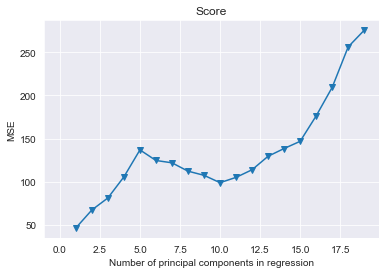

In [124]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [125]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [126]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank'], axis=1).astype('float64')

In [127]:
X_test.columns

Index(['DPointsAllowed', 'Home', 'PointSpread', 'OverUnder', 'total',
       'CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame'],
      dtype='object')

In [128]:
cols = ['CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'Home',
       'PointSpread', 'OverUnder', 'total', 'DPointsAllowed']

In [129]:
X_test = X_test[cols]
X_test.head()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,14.200000,25.800000,55.0,164.000000,6.4,0.600000,1.000000,66.04,1.400000,7.200000,...,0.000000,0.000000,0.0,0.000000,1.1,1.0,-1.0,43.0,22.0,22.64
Sam Bradford,16.666667,26.666667,62.5,133.333333,5.0,0.666667,1.333333,62.50,0.666667,2.333333,...,0.333333,2.666667,8.0,0.000000,0.3,1.0,-1.0,43.0,22.0,22.64
Joe Flacco,26.714286,43.285714,61.7,295.285714,6.8,1.571429,0.571429,88.54,2.428571,4.428571,...,0.428571,0.000000,0.0,0.000000,5.8,0.0,-2.0,44.0,23.0,20.87
Lamar Jackson,0.285714,0.857143,33.3,4.142857,4.8,0.000000,0.000000,50.00,2.857143,14.714286,...,1.000000,4.857143,4.9,0.142857,1.4,0.0,-2.0,44.0,23.0,20.87
Cam Newton,22.833333,34.833333,65.6,237.833333,6.8,1.833333,0.666667,94.73,8.666667,42.833333,...,1.333333,3.333333,2.5,0.500000,9.3,1.0,2.0,44.0,21.0,14.60


In [130]:
X_train.columns

Index(['CompletionsGame', 'AttemptsGame', 'PassingCompletionPercentage',
       'YardsGame', 'PassingYardsPerAttempt', 'PassingTouchdownsGame',
       'InterceptionsGame', 'PassingRating', 'RushingAttemptsGame',
       'RushingYardsGame', 'RushingYardsPerAttempt', 'RushingTouchdownsGame',
       'PointsGame', 'RZCompletionsGame', 'RZAttemptsGame',
       'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'Home', 'PointSpread',
       'OverUnder', 'total', 'DPointsAllowed'],
      dtype='object')

In [131]:
X_train

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Patrick Mahomes,22.500000,35.333333,63.7,310.833333,8.8,3.000000,0.666667,112.24,4.000000,12.500000,...,1.333333,4.666667,3.5,0.333333,11.5,1.0,-6.0,57.5,31.75,25.89
Matt Ryan,26.000000,37.333333,69.6,326.000000,8.7,2.333333,0.333333,113.62,2.333333,11.000000,...,0.333333,1.500000,4.5,0.333333,10.5,1.0,-6.0,54.0,30.00,19.38
Andrew Luck,31.000000,48.000000,64.6,298.666667,6.2,2.666667,1.333333,88.77,1.833333,10.000000,...,0.166667,0.333333,2.0,0.000000,10.9,1.0,-7.5,43.0,25.25,16.44
Kirk Cousins,30.833333,43.333333,71.2,320.166667,7.4,2.000000,0.500000,102.74,3.500000,12.666667,...,0.166667,1.166667,7.0,0.166667,7.9,0.0,-3.5,46.5,25.00,20.30
Jared Goff,22.333333,32.333333,69.1,321.333333,9.9,2.000000,0.833333,110.93,2.833333,8.500000,...,0.500000,1.000000,2.0,0.000000,6.6,0.0,-10.0,52.5,31.25,22.64
Deshaun Watson,23.333333,36.166667,64.5,299.666667,8.3,1.500000,1.166667,90.75,6.000000,33.833333,...,1.833333,9.500000,5.2,0.166667,7.2,0.0,5.0,42.0,18.50,15.37
Philip Rivers,22.166667,32.333333,68.6,283.666667,8.8,2.500000,0.500000,115.10,1.666667,0.000000,...,1.333333,-1.333333,-1.0,0.000000,8.1,1.0,-6.5,45.0,25.75,17.78
Drew Brees,29.600000,38.000000,77.9,331.600000,8.7,2.200000,0.000000,122.32,2.000000,1.200000,...,0.600000,2.000000,3.3,0.400000,10.8,0.0,2.5,50.0,23.75,14.60
Blake Bortles,24.166667,39.500000,61.2,279.000000,7.1,1.500000,1.333333,81.09,4.333333,31.333333,...,0.333333,2.833333,8.5,0.000000,3.1,1.0,-5.0,42.0,23.50,18.26


In [132]:
X_test

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,14.200000,25.800000,55.0,164.000000,6.4,0.600000,1.000000,66.04,1.400000,7.200000,...,0.000000,0.000000,0.0,0.000000,1.1,1.0,-1.0,43.0,22.00,22.64
Sam Bradford,16.666667,26.666667,62.5,133.333333,5.0,0.666667,1.333333,62.50,0.666667,2.333333,...,0.333333,2.666667,8.0,0.000000,0.3,1.0,-1.0,43.0,22.00,22.64
Joe Flacco,26.714286,43.285714,61.7,295.285714,6.8,1.571429,0.571429,88.54,2.428571,4.428571,...,0.428571,0.000000,0.0,0.000000,5.8,0.0,-2.0,44.0,23.00,20.87
Lamar Jackson,0.285714,0.857143,33.3,4.142857,4.8,0.000000,0.000000,50.00,2.857143,14.714286,...,1.000000,4.857143,4.9,0.142857,1.4,0.0,-2.0,44.0,23.00,20.87
Cam Newton,22.833333,34.833333,65.6,237.833333,6.8,1.833333,0.666667,94.73,8.666667,42.833333,...,1.333333,3.333333,2.5,0.500000,9.3,1.0,2.0,44.0,21.00,14.60
Mitch Trubisky,23.166667,35.166667,65.9,265.666667,7.6,2.166667,1.000000,97.15,5.166667,40.833333,...,0.333333,1.666667,5.0,0.333333,10.3,1.0,-7.5,44.5,26.00,20.30
Chase Daniel,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,1.000000,-1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1.0,-7.5,44.5,26.00,20.30
Andy Dalton,23.428571,36.857143,63.6,260.285714,7.1,2.142857,1.142857,90.94,1.142857,4.428571,...,0.142857,0.285714,2.0,0.000000,7.2,1.0,-4.0,54.5,29.25,30.07
Jeff Driskel,4.000000,4.000000,100.0,39.000000,9.8,0.000000,0.000000,107.29,1.000000,5.000000,...,0.000000,0.000000,0.0,0.000000,0.0,1.0,-4.0,54.5,29.25,30.07


In [133]:
QBproj = pls.predict(scale(X_test))

In [134]:
QBs['Projections'] = QBproj
QBs

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Team,Rank,CompletionsGame,AttemptsGame,...,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,Projections
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4800.0,22.64,True,-1.0,43.0,22.00,ARI,36.0,14.200000,25.800000,...,3.1,0.200000,0.000000,75.57,0.000000,0.000000,0.0,0.000000,1.1,13.638243
Sam Bradford,4600.0,22.64,True,-1.0,43.0,22.00,ARI,38.0,16.666667,26.666667,...,1.0,0.000000,0.000000,56.25,0.333333,2.666667,8.0,0.000000,0.3,10.753043
Joe Flacco,5300.0,20.87,False,-2.0,44.0,23.00,BAL,16.0,26.714286,43.285714,...,3.8,1.285714,0.142857,95.83,0.428571,0.000000,0.0,0.000000,5.8,18.344283
Lamar Jackson,4400.0,20.87,False,-2.0,44.0,23.00,BAL,40.0,0.285714,0.857143,...,2.5,0.000000,0.000000,56.25,1.000000,4.857143,4.9,0.142857,1.4,13.758771
Cam Newton,5800.0,14.60,True,2.0,44.0,21.00,CAR,12.0,22.833333,34.833333,...,4.7,1.166667,0.000000,116.87,1.333333,3.333333,2.5,0.500000,9.3,29.182722
Mitch Trubisky,6100.0,20.30,True,-7.5,44.5,26.00,CHI,7.0,23.166667,35.166667,...,3.9,1.833333,0.166667,95.14,0.333333,1.666667,5.0,0.333333,10.3,28.856709
Chase Daniel,4300.0,20.30,True,-7.5,44.5,26.00,CHI,53.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,7.887611
Andy Dalton,6200.0,30.07,True,-4.0,54.5,29.25,CIN,14.0,23.428571,36.857143,...,4.6,1.571429,0.142857,100.33,0.142857,0.285714,2.0,0.000000,7.2,26.282125
Jeff Driskel,4400.0,30.07,True,-4.0,54.5,29.25,CIN,45.0,4.000000,4.000000,...,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,16.478746


In [202]:
QBs.to_csv('Week8QBProjections.csv')

In [74]:
RB = pd.read_csv('RB_Aggregate.csv')

In [75]:
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,20.571429,98.000000,4.8,1.571429,5.000000,3.571429,38.571429,0.428571,30.9
Saquon Barkley,NYG,2,14.000000,68.714286,4.9,0.714286,8.714286,7.000000,60.571429,0.285714,27.1
Melvin Gordon,LAC,3,15.166667,77.666667,5.1,1.000000,7.000000,5.000000,46.500000,0.500000,28.6
Alvin Kamara,NO,4,13.166667,60.500000,4.6,1.000000,8.833333,6.666667,60.333333,0.166667,27.9
Kareem Hunt,KC,5,16.857143,77.428571,4.6,0.714286,3.000000,2.142857,32.285714,0.571429,21.7


In [76]:
RB_RZ = pd.read_csv('RB_RZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,6.142857,17.714286,2.9,1.571429,1.857143,1.000000,9.285714,0.428571,16.3
Melvin Gordon,2.500000,15.333333,6.1,1.000000,1.666667,1.000000,5.500000,0.500000,12.8
Alvin Kamara,4.500000,13.833333,3.1,0.833333,2.500000,1.833333,10.666667,0.166667,11.0
Kareem Hunt,2.571429,6.571429,2.6,0.714286,1.000000,0.571429,4.857143,0.428571,8.6
James White,1.000000,2.142857,2.1,0.000000,1.571429,1.285714,9.571429,0.857143,7.6


In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,14.57
JAX,20.50
DAL,22.43
SEA,22.97
TEN,17.80


In [70]:
RBSalaries = pd.read_csv('RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank', 'FantasyPointsDraftKings'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary
Opponent,,,
GB,Todd Gurley,LAR,9800.0
WAS,Saquon Barkley,NYG,8800.0
DEN,Kareem Hunt,KC,7100.0
CLE,James Conner,PIT,7500.0
TB,Joe Mixon,CIN,7300.0


In [71]:
RBSalaries = RBSalaries.join(RBDef)
RBSalaries = RBSalaries.set_index('Team').join(Vegas)
RBSalaries.head()

,Name,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Team,,,,,,,
ARI,David Johnson,6700.0,28.93,True,-1.0,43.0,22.0
ARI,Chase Edmonds,4200.0,28.93,True,-1.0,43.0,22.0
ARI,Derrick Coleman,3000.0,28.93,True,-1.0,43.0,22.0
ARI,TJ Logan,3000.0,28.93,True,-1.0,43.0,22.0
BAL,Alex Collins,4600.0,19.58,False,-2.0,44.0,23.0


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Name,,,,,,
David Johnson,6700.0,28.93,True,-1.0,43.0,22.0
Chase Edmonds,4200.0,28.93,True,-1.0,43.0,22.0
Derrick Coleman,3000.0,28.93,True,-1.0,43.0,22.0
TJ Logan,3000.0,28.93,True,-1.0,43.0,22.0
Alex Collins,4600.0,19.58,False,-2.0,44.0,23.0


In [90]:
RBs = RBSalaries.join(RBavg).join(RBRZ).dropna()
RBs.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Team,Rank,RushesGame,RushYardGame,...,PointsGame,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6700.0,28.93,True,-1.0,43.0,22.0,ARI,11.0,15.142857,47.857143,...,14.9,2.285714,5.142857,2.2,0.714286,0.714286,0.285714,0.571429,0.000000,5.1
Chase Edmonds,4200.0,28.93,True,-1.0,43.0,22.0,ARI,68.0,2.857143,7.428571,...,3.2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Derrick Coleman,3000.0,28.93,True,-1.0,43.0,22.0,ARI,105.0,0.285714,0.428571,...,0.6,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
TJ Logan,3000.0,28.93,True,-1.0,43.0,22.0,ARI,132.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Alex Collins,4600.0,19.58,False,-2.0,44.0,23.0,BAL,25.0,12.428571,44.142857,...,11.4,1.714286,5.428571,3.2,0.571429,0.571429,0.285714,1.571429,0.142857,5.1


In [78]:
RBs.columns

Index(['DraftKingsSalary', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'Team', 'Rank', 'RushesGame', 'RushYardGame',
       'YardAttempt', 'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame',
       'RecTdGame', 'PointsGame', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame'],
      dtype='object')

In [145]:
RBtrain = pd.read_csv('Week7RBdata.csv')
RBtrain = RBtrain.set_index('Name')

In [146]:
RBtrain.columns

Index(['Team', 'Rank', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'PrimeTime', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed', 'Opponent'],
      dtype='object')

In [147]:
X_train = RBtrain.drop(['Score', 'Team', 'Rank', 'Opponent', 'PrimeTime'], axis=1).astype('float64')
y_train = RBtrain.Score

In [148]:
X_train.columns

Index(['RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame', 'RZTarGame',
       'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame', 'Home',
       'PointSpread', 'OverUnder', 'total', 'DPointsAllowed'],
      dtype='object')

In [149]:
cols = ['RushesGame', 'RushYardGame', 'YardAttempt', 'RushTdGame',
       'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame', 'PointsGame',
       'RZattemptsGame', 'RZyardsGame', 'RZYardAtt', 'RZTDGame', 'RZTarGame',
       'RZRecGame', 'RZRecYarGame', 'RZRecTDGame', 'RZPointsGame', 'Home',
       'PointSpread', 'OverUnder', 'total', 'DPointsAllowed']

In [150]:
X_train = X_train[cols]

In [151]:
X_train

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Todd Gurley,21.500000,103.833333,4.8,1.500000,5.000000,3.500000,41.166667,0.333333,31.0,6.166667,...,1.833333,1.000000,8.833333,0.333333,15.4,0.0,-10.0,52.5,31.25,28.93
Saquon Barkley,14.000000,73.000000,5.2,0.666667,8.500000,6.666667,62.166667,0.333333,27.2,2.000000,...,1.166667,0.833333,5.833333,0.166667,4.8,0.0,6.0,54.0,24.00,33.41
Alvin Kamara,12.400000,59.800000,4.8,1.000000,10.200000,7.600000,70.200000,0.200000,30.4,4.200000,...,3.000000,2.200000,12.800000,0.200000,11.4,0.0,2.5,50.0,23.75,14.57
Ezekiel Elliott,19.500000,97.666667,5.0,0.500000,5.000000,3.833333,27.666667,0.166667,21.7,2.333333,...,0.833333,0.666667,2.166667,0.000000,4.5,0.0,1.5,42.0,20.25,19.95
Kareem Hunt,17.166667,76.000000,4.4,0.666667,2.500000,1.666667,28.500000,0.333333,19.1,2.500000,...,0.500000,0.166667,0.833333,0.166667,5.9,1.0,-6.0,57.5,31.75,31.57
James White,4.833333,24.833333,5.1,0.166667,8.500000,6.166667,53.833333,0.666667,19.0,1.000000,...,1.500000,1.166667,10.000000,0.666667,6.4,0.0,-3.0,49.5,26.25,18.65
Christian McCaffrey,14.200000,69.800000,4.9,0.000000,8.000000,6.800000,47.600000,0.200000,20.7,1.600000,...,0.800000,0.600000,4.800000,0.200000,2.4,0.0,5.0,45.0,20.00,19.69
TJ Yeldon,11.166667,49.833333,4.5,0.166667,6.166667,4.166667,37.166667,0.500000,16.7,1.666667,...,1.000000,0.500000,5.833333,0.333333,4.7,1.0,-5.0,42.0,23.50,21.85
David Johnson,15.333333,49.333333,3.2,0.833333,4.500000,2.833333,22.500000,0.166667,15.7,2.333333,...,0.833333,0.333333,0.666667,0.000000,6.0,1.0,1.0,42.0,20.50,29.24


In [152]:
X_test = RBs[cols]

In [153]:
X_test

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,RZattemptsGame,...,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,15.142857,47.857143,3.2,0.714286,4.285714,2.857143,23.714286,0.142857,14.9,2.285714,...,0.714286,0.285714,0.571429,0.000000,5.1,True,-1.0,43.0,22.00,28.93
Chase Edmonds,2.857143,7.428571,2.6,0.000000,1.857143,1.714286,7.285714,0.000000,3.2,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,True,-1.0,43.0,22.00,28.93
Derrick Coleman,0.285714,0.428571,1.5,0.000000,0.285714,0.285714,2.428571,0.000000,0.6,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,True,-1.0,43.0,22.00,28.93
TJ Logan,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,True,-1.0,43.0,22.00,28.93
Alex Collins,12.428571,44.142857,3.6,0.571429,2.571429,1.714286,12.428571,0.142857,11.4,1.714286,...,0.571429,0.285714,1.571429,0.142857,5.1,False,-2.0,44.0,23.00,19.58
Javorius Allen,5.428571,14.285714,2.6,0.428571,4.714286,3.857143,24.285714,0.142857,11.0,1.571429,...,0.571429,0.571429,4.000000,0.142857,4.6,False,-2.0,44.0,23.00,19.58
Gus Edwards,6.000000,21.000000,3.5,0.000000,0.000000,0.000000,0.000000,0.000000,2.1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,False,-2.0,44.0,23.00,19.58
Kenneth Dixon,13.000000,44.000000,3.4,1.000000,0.000000,0.000000,0.000000,0.000000,10.4,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.2,False,-2.0,44.0,23.00,19.58
Christian McCaffrey,13.000000,63.000000,4.8,0.000000,7.666667,6.666667,48.166667,0.166667,19.6,1.333333,...,0.666667,0.500000,4.000000,0.166667,2.0,True,2.0,44.0,21.00,14.57


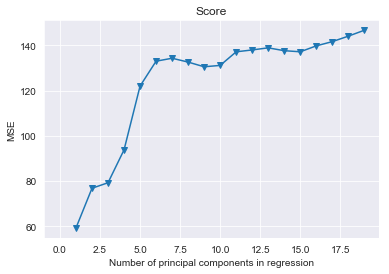

In [154]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [155]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)
Projections = pls.predict(scale(X_test))

In [156]:
RBs['Projections'] = Projections
RBs

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Team,Rank,RushesGame,RushYardGame,...,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame,Projections
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6700.0,28.93,True,-1.0,43.0,22.00,ARI,11.0,15.142857,47.857143,...,2.285714,5.142857,2.2,0.714286,0.714286,0.285714,0.571429,0.000000,5.1,13.434655
Chase Edmonds,4200.0,28.93,True,-1.0,43.0,22.00,ARI,68.0,2.857143,7.428571,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.130402
Derrick Coleman,3000.0,28.93,True,-1.0,43.0,22.00,ARI,105.0,0.285714,0.428571,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.331580
TJ Logan,3000.0,28.93,True,-1.0,43.0,22.00,ARI,132.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.420894
Alex Collins,4600.0,19.58,False,-2.0,44.0,23.00,BAL,25.0,12.428571,44.142857,...,1.714286,5.428571,3.2,0.571429,0.571429,0.285714,1.571429,0.142857,5.1,12.566492
Javorius Allen,4000.0,19.58,False,-2.0,44.0,23.00,BAL,28.0,5.428571,14.285714,...,1.571429,1.714286,1.1,0.428571,0.571429,0.571429,4.000000,0.142857,4.6,10.171930
Gus Edwards,3000.0,19.58,False,-2.0,44.0,23.00,BAL,102.0,6.000000,21.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.089646
Kenneth Dixon,3000.0,19.58,False,-2.0,44.0,23.00,BAL,82.0,13.000000,44.000000,...,1.000000,2.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,6.2,6.051898
Christian McCaffrey,7000.0,14.57,True,2.0,44.0,21.00,CAR,10.0,13.000000,63.000000,...,1.333333,2.666667,2.0,0.000000,0.666667,0.500000,4.000000,0.166667,2.0,15.185938


In [203]:
RBs.to_csv('Week8RBProjections.csv')

In [167]:
WR = pd.read_csv('WR_Aggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,13.000000,9.571429,73.6,117.428571,0.714286,9.0,12.3,0.000000,0.000000,0.0,0,28.6
Tyreek Hill,2,KC,8.714286,5.857143,67.2,90.714286,1.000000,10.4,15.5,1.428571,6.428571,4.5,0,23.3
Emmanuel Sanders,3,DEN,8.714286,6.571429,75.4,86.142857,0.428571,9.9,13.1,0.285714,7.571429,26.5,1,21.4
DeAndre Hopkins,4,HOU,10.142857,6.714286,66.2,101.000000,0.571429,10.0,15.0,0.142857,-1.000000,-7.0,0,21.3
Odell Beckham Jr,5,NYG,11.428571,7.571429,66.2,92.714286,0.285714,8.1,12.2,0.571429,1.142857,2.0,0,21.1


In [160]:
WRRZ = pd.read_csv('WR_RZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.500000,1.166667,46.7,11.000000,1.000000,4.4,9.4,0.0,0.0,0.0,0.0,8.3
Michael Thomas,2.333333,2.000000,85.7,13.166667,0.666667,5.6,6.6,0.0,0.0,0.0,0.0,7.3
Alshon Jeffery,2.250000,1.500000,66.7,14.000000,1.000000,6.2,9.3,0.0,0.0,0.0,0.0,8.9
Calvin Ridley,0.714286,0.714286,100.0,8.000000,0.571429,11.2,11.2,0.0,0.0,0.0,0.0,4.9
Tyreek Hill,1.285714,1.000000,77.8,3.857143,0.571429,3.0,3.9,0.0,0.0,0.0,0.0,4.8


In [161]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,32.21
JAX,29.46
DAL,29.70
SEA,35.78
TEN,41.56


In [162]:
WRSalaries = pd.read_csv('WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank', 'FantasyPointsDraftKings'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary
Opponent,,,
CLE,Antonio Brown,PIT,8500.0
TB,AJ Green,CIN,8000.0
WAS,Odell Beckham Jr,NYG,7500.0
DEN,Tyreek Hill,KC,8600.0
LAR,Davante Adams,GB,7900.0


In [163]:
WRSalaries = WRSalaries.join(WRDef)
WRSalaries = WRSalaries.set_index('Team').join(Vegas)
WRSalaries.head()

,Name,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Team,,,,,,,
ARI,Larry Fitzgerald,4400.0,40.2,True,-1.0,43.0,22.0
ARI,Christian Kirk,4500.0,40.2,True,-1.0,43.0,22.0
ARI,Chad Williams,3000.0,40.2,True,-1.0,43.0,22.0
ARI,JJ Nelson,3000.0,40.2,True,-1.0,43.0,22.0
ARI,Trent Sherfield,3000.0,40.2,True,-1.0,43.0,22.0


In [164]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Name,,,,,,
Larry Fitzgerald,4400.0,40.2,True,-1.0,43.0,22.0
Christian Kirk,4500.0,40.2,True,-1.0,43.0,22.0
Chad Williams,3000.0,40.2,True,-1.0,43.0,22.0
JJ Nelson,3000.0,40.2,True,-1.0,43.0,22.0
Trent Sherfield,3000.0,40.2,True,-1.0,43.0,22.0


In [168]:
WRs = WRSalaries.join(WRavg).join(WRRZ).dropna()
WRs.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Rank,Team,TargetsGame,RecGame,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4400.0,40.2,True,-1.0,43.0,22.0,60.0,ARI,6.142857,3.714286,...,60.0,3.142857,0.142857,4.4,7.3,0.000000,0.000000,0.0,0.0,1.6
Christian Kirk,4500.0,40.2,True,-1.0,43.0,22.0,47.0,ARI,5.285714,4.000000,...,100.0,0.428571,0.000000,3.0,3.0,0.142857,0.714286,5.0,0.0,0.3
Chad Williams,3000.0,40.2,True,-1.0,43.0,22.0,108.0,ARI,4.142857,1.285714,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
JJ Nelson,3000.0,40.2,True,-1.0,43.0,22.0,139.0,ARI,1.285714,0.571429,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
Trent Sherfield,3000.0,40.2,True,-1.0,43.0,22.0,177.0,ARI,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [169]:
WRs.columns

Index(['DraftKingsSalary', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'Rank', 'Team', 'TargetsGame', 'RecGame',
       'RecPercentage', 'RecYardsGame', 'RecTdGame', 'YardsTarget',
       'RecYardsRec', 'RushesGame', 'RushYardsGame', 'YardAttempt',
       'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame'],
      dtype='object')

In [170]:
WRtrain = pd.read_csv('Week7WRdata.csv')
WRtrain = WRtrain.set_index('Name')

In [171]:
WRtrain.columns

Index(['Rank', 'Team', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'PrimeTime', 'Home', 'PointSpread', 'OverUnder', 'total',
       'DPointsAllowed', 'Opponent'],
      dtype='object')

In [173]:
X_train = WRtrain.drop(['Score', 'Team', 'Rank', 'Opponent', 'PrimeTime'], axis=1).astype('float64')
y_train = WRtrain.Score

In [174]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed'],
      dtype='object')

In [175]:
cols = ['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed']

In [176]:
X_train = X_train[cols]
X_train

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Adam Thielen,13.500000,9.666667,71.6,118.666667,0.666667,8.8,12.3,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,3.6,0.0,-3.5,46.5,25.00,47.54
Tyreek Hill,8.500000,5.666667,66.7,94.500000,1.000000,11.1,16.7,1.333333,6.166667,4.6,...,0.000000,0.000000,0.0,0.0,4.2,1.0,-6.0,57.5,31.75,41.39
DeAndre Hopkins,10.500000,7.333333,69.8,109.500000,0.500000,10.4,14.9,0.166667,-1.166667,-7.0,...,0.000000,0.000000,0.0,0.0,3.5,0.0,5.0,42.0,18.50,29.46
Julio Jones,11.500000,7.333333,63.8,118.000000,0.000000,10.3,16.1,0.166667,1.833333,11.0,...,0.000000,0.000000,0.0,0.0,0.0,1.0,-6.0,54.0,30.00,36.27
Robert Woods,8.500000,6.000000,70.6,87.333333,0.500000,10.3,14.6,1.166667,14.000000,12.0,...,0.166667,1.000000,6.0,0.0,2.8,0.0,-10.0,52.5,31.25,40.20
Michael Thomas,9.800000,9.200000,93.9,103.800000,0.600000,10.6,11.3,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,7.1,0.0,2.5,50.0,23.75,32.21
Emmanuel Sanders,9.000000,6.666667,74.1,83.500000,0.333333,9.3,12.5,0.333333,8.833333,26.5,...,0.000000,0.000000,0.0,0.0,0.8,0.0,-1.0,42.0,21.50,36.59
Odell Beckham Jr,11.500000,7.500000,65.2,84.333333,0.166667,7.3,11.2,0.500000,1.500000,3.0,...,0.166667,-0.166667,-1.0,0.0,0.1,0.0,6.0,54.0,24.00,47.83
AJ Green,9.166667,5.500000,60.0,82.333333,0.833333,9.0,15.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,4.4,0.0,6.0,57.5,25.75,39.64


In [177]:
X_test = WRs[cols]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,6.142857,3.714286,60.5,36.428571,0.142857,5.9,9.8,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,1.6,True,-1.0,43.0,22.00,40.20
Christian Kirk,5.285714,4.000000,75.7,52.571429,0.142857,9.9,13.1,0.285714,1.714286,6.0,...,0.142857,0.714286,5.0,0.000000,0.3,True,-1.0,43.0,22.00,40.20
Chad Williams,4.142857,1.285714,31.0,13.142857,0.142857,3.2,10.2,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,True,-1.0,43.0,22.00,40.20
JJ Nelson,1.285714,0.571429,44.4,3.000000,0.000000,2.3,5.2,0.142857,1.000000,7.0,...,0.000000,0.000000,0.0,0.000000,0.0,True,-1.0,43.0,22.00,40.20
Trent Sherfield,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,True,-1.0,43.0,22.00,40.20
Michael Crabtree,9.142857,5.000000,54.7,58.428571,0.285714,6.4,11.7,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,2.4,False,-2.0,44.0,23.00,37.25
John Brown,7.714286,4.000000,51.9,79.714286,0.571429,10.3,19.9,0.285714,0.571429,2.0,...,0.000000,0.000000,0.0,0.000000,2.8,False,-2.0,44.0,23.00,37.25
Willie Snead,7.142857,4.714286,66.0,48.000000,0.142857,6.7,10.2,0.142857,1.857143,13.0,...,0.000000,0.000000,0.0,0.000000,1.4,False,-2.0,44.0,23.00,37.25
Chris Moore,1.714286,1.285714,75.0,11.285714,0.000000,6.6,8.8,0.428571,2.000000,4.7,...,0.000000,0.000000,0.0,0.000000,0.0,False,-2.0,44.0,23.00,37.25


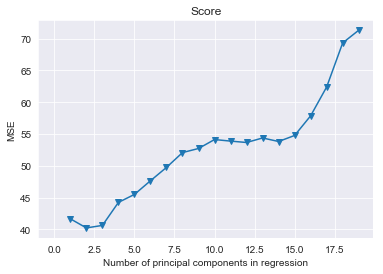

In [178]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);


In [179]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)
Projections = pls.predict(scale(X_test))

In [180]:
WRs['Projections'] = Projections
WRs

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Rank,Team,TargetsGame,RecGame,...,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Projections
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4400.0,40.20,True,-1.0,43.0,22.00,60.0,ARI,6.142857,3.714286,...,3.142857,0.142857,4.4,7.3,0.000000,0.000000,0.0,0.000000,1.6,10.604431
Christian Kirk,4500.0,40.20,True,-1.0,43.0,22.00,47.0,ARI,5.285714,4.000000,...,0.428571,0.000000,3.0,3.0,0.142857,0.714286,5.0,0.000000,0.3,10.134934
Chad Williams,3000.0,40.20,True,-1.0,43.0,22.00,108.0,ARI,4.142857,1.285714,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,8.688306
JJ Nelson,3000.0,40.20,True,-1.0,43.0,22.00,139.0,ARI,1.285714,0.571429,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,5.996425
Trent Sherfield,3000.0,40.20,True,-1.0,43.0,22.00,177.0,ARI,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,3.890622
Michael Crabtree,4800.0,37.25,False,-2.0,44.0,23.00,31.0,BAL,9.142857,5.000000,...,2.428571,0.285714,2.8,5.7,0.000000,0.000000,0.0,0.000000,2.4,14.317869
John Brown,5900.0,37.25,False,-2.0,44.0,23.00,16.0,BAL,7.714286,4.000000,...,5.285714,0.285714,5.3,9.2,0.000000,0.000000,0.0,0.000000,2.8,15.713892
Willie Snead,4200.0,37.25,False,-2.0,44.0,23.00,44.0,BAL,7.142857,4.714286,...,2.571429,0.142857,6.0,9.0,0.000000,0.000000,0.0,0.000000,1.4,12.775733
Chris Moore,3000.0,37.25,False,-2.0,44.0,23.00,118.0,BAL,1.714286,1.285714,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,7.169636


In [204]:
WRs.to_csv('Week8WRProjections.csv')

In [182]:
TE = pd.read_csv('TE_Aggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Zach Ertz,1,PHI,11.142857,8.142857,73.1,88.285714,0.285714,7.9,10.8,0.000000,0.000000,0,0,20.0
Travis Kelce,2,KC,8.571429,5.428571,63.3,80.428571,0.428571,9.4,14.8,0.000000,0.000000,0,0,17.3
Eric Ebron,3,IND,8.428571,4.714286,55.9,51.000000,0.857143,6.1,10.8,0.142857,-0.142857,-1,0,15.4
George Kittle,4,SF,7.000000,4.571429,65.3,75.285714,0.285714,10.8,16.5,0.000000,0.000000,0,0,14.5
Jared Cook,5,OAK,7.166667,5.333333,74.4,66.666667,0.333333,9.3,12.5,0.000000,0.000000,0,0,15.0


In [184]:
TERZ = pd.read_csv('TE_RZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,2.000000,0.857143,42.9,7.714286,0.714286,3.9,9.0,0.142857,-0.142857,-1,0.0,5.9
Trey Burton,1.000000,0.833333,83.3,6.333333,0.500000,6.3,7.6,0.166667,0.333333,2,0.0,4.5
Jared Cook,1.833333,1.500000,81.8,8.833333,0.333333,4.8,5.9,0.000000,0.000000,0,0.0,4.4
Erik Swoope,0.800000,0.800000,100.0,7.800000,0.600000,9.8,9.8,0.000000,0.000000,0,0.0,5.2
Cameron Brate,0.666667,0.500000,75.0,5.833333,0.500000,8.8,11.7,0.000000,0.000000,0,0.0,4.1


In [185]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,32.21
JAX,29.46
DAL,29.70
SEA,35.78
TEN,41.56


In [186]:
TESalaries = pd.read_csv('TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank', 'FantasyPointsDraftKings'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary
Opponent,,,
DEN,Travis Kelce,KC,6800.0
OAK,Eric Ebron,IND,4900.0
ARI,George Kittle,SF,5500.0
IND,Jared Cook,OAK,5000.0
LAR,Jimmy Graham,GB,4700.0


In [187]:
TESalaries = TESalaries.join(TEDef)
TESalaries = TESalaries.set_index('Team').join(Vegas)
TESalaries.head()

,Name,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Team,,,,,,,
ARI,Ricky Seals-Jones,3000.0,40.20,True,-1.0,43.0,22.0
ARI,Jermaine Gresham,2600.0,40.20,True,-1.0,43.0,22.0
ARI,Gabe Holmes,2500.0,40.20,True,-1.0,43.0,22.0
BAL,Mark Andrews,2700.0,37.25,False,-2.0,44.0,23.0
BAL,Nick Boyle,2500.0,37.25,False,-2.0,44.0,23.0


In [188]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total
Name,,,,,,
Ricky Seals-Jones,3000.0,40.20,True,-1.0,43.0,22.0
Jermaine Gresham,2600.0,40.20,True,-1.0,43.0,22.0
Gabe Holmes,2500.0,40.20,True,-1.0,43.0,22.0
Mark Andrews,2700.0,37.25,False,-2.0,44.0,23.0
Nick Boyle,2500.0,37.25,False,-2.0,44.0,23.0


In [189]:
TEs = TESalaries.join(TEavg).join(TERZ).dropna()
TEs.head()

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Rank,Team,TargetsGame,RecGame,...,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3000.0,40.20,True,-1.0,43.0,22.0,20.0,ARI,5.000000,2.428571,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jermaine Gresham,2600.0,40.20,True,-1.0,43.0,22.0,71.0,ARI,0.800000,0.600000,...,100.0,2.200000,0.000000,11.0,11.0,0.0,0.0,0.0,0.0,0.4
Gabe Holmes,2500.0,40.20,True,-1.0,43.0,22.0,96.0,ARI,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mark Andrews,2700.0,37.25,False,-2.0,44.0,23.0,21.0,BAL,3.000000,2.000000,...,75.0,2.428571,0.285714,4.2,5.7,0.0,0.0,0.0,0.0,2.4
Nick Boyle,2500.0,37.25,False,-2.0,44.0,23.0,38.0,BAL,3.428571,1.857143,...,33.3,0.857143,0.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.4


In [190]:
TEs.columns

Index(['DraftKingsSalary', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'Rank', 'Team', 'TargetsGame', 'RecGame',
       'RecPercentage', 'RecYardsGame', 'RecTdGame', 'YardsTarget',
       'RecYardsRec', 'RushesGame', 'RushYardsGame', 'YardAttempt',
       'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame'],
      dtype='object')

In [191]:
TEtrain = pd.read_csv('Week7TEdata.csv')
TEtrain = TEtrain.set_index('Name')

In [192]:
TEtrain.columns

Index(['Rank', 'Team', 'TargetsGame', 'RecGame', 'RecPercentage',
       'RecYardsGame', 'RecTdGame', 'YardsTarget', 'RecYardsRec', 'RushesGame',
       'RushYardsGame', 'YardAttempt', 'RushTdGame', 'PointsGame', 'Score',
       'RZTargetsGame', 'RZRecGame', 'RZRecPercentage', 'RZRecYardsGame',
       'RZRecTdGame', 'RZYardsTarget', 'RZRecYardsRec', 'RZRushesGame',
       'RZRushYardsGame', 'RZYardAttempt', 'RZRushTdGame', 'RZPointsGame',
       'PrimeTime', 'Home', 'PointSpread', 'OverUnder', 'total',
       'DPointsAllowed', 'Opponent'],
      dtype='object')

In [193]:
X_train = TEtrain.drop(['Score', 'Team', 'Rank', 'Opponent', 'PrimeTime'], axis=1).astype('float64')
y_train = TEtrain.Score

In [194]:
X_train.columns

Index(['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed'],
      dtype='object')

In [195]:
cols = ['TargetsGame', 'RecGame', 'RecPercentage', 'RecYardsGame', 'RecTdGame',
       'YardsTarget', 'RecYardsRec', 'RushesGame', 'RushYardsGame',
       'YardAttempt', 'RushTdGame', 'PointsGame', 'RZTargetsGame', 'RZRecGame',
       'RZRecPercentage', 'RZRecYardsGame', 'RZRecTdGame', 'RZYardsTarget',
       'RZRecYardsRec', 'RZRushesGame', 'RZRushYardsGame', 'RZYardAttempt',
       'RZRushTdGame', 'RZPointsGame', 'Home', 'PointSpread', 'OverUnder',
       'total', 'DPointsAllowed']

In [196]:
X_train = X_train[cols]
X_train

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Zach Ertz,11.166667,8.000000,71.6,80.000000,0.333333,7.2,10.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,3.4,1.0,-5.0,45.0,25.00,19.63
Travis Kelce,9.166667,5.500000,60.0,78.000000,0.500000,8.5,14.2,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,3.3,1.0,-6.0,57.5,31.75,17.69
Eric Ebron,8.666667,5.000000,57.7,54.333333,1.000000,6.3,10.9,0.166667,-0.166667,-1.0,...,0.166667,-0.166667,-1.0,0.0,6.9,1.0,-7.5,43.0,25.25,10.86
George Kittle,6.833333,4.500000,65.9,71.500000,0.166667,10.5,15.9,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,1.2,1.0,10.0,52.5,21.25,13.70
Austin Hooper,6.166667,5.000000,81.1,45.500000,0.333333,7.4,9.1,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,3.5,1.0,-6.0,54.0,30.00,10.00
Kyle Rudolph,5.166667,4.500000,87.1,44.333333,0.333333,8.6,9.9,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,2.9,0.0,-3.5,46.5,25.00,9.84
David Njoku,7.666667,4.500000,58.7,40.833333,0.166667,5.3,9.1,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,1.2,0.0,3.0,49.5,23.25,20.13
OJ Howard,4.200000,3.000000,71.4,56.800000,0.400000,13.5,18.9,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,2.1,1.0,-3.0,49.5,26.25,12.87
Trey Burton,4.600000,3.000000,65.2,39.800000,0.600000,8.7,13.3,0.200000,0.400000,2.0,...,0.200000,0.400000,2.0,0.0,3.6,1.0,3.0,49.5,23.25,16.93


In [197]:
X_test = TEs[cols]
X_test

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Home,PointSpread,OverUnder,total,DPointsAllowed
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,5.000000,2.428571,48.6,29.142857,0.142857,5.8,12.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,True,-1.0,43.0,22.00,40.20
Jermaine Gresham,0.800000,0.600000,75.0,9.200000,0.000000,11.5,15.3,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.4,True,-1.0,43.0,22.00,40.20
Gabe Holmes,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,True,-1.0,43.0,22.00,40.20
Mark Andrews,3.000000,2.000000,66.7,23.285714,0.285714,7.8,11.6,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,2.4,False,-2.0,44.0,23.00,37.25
Nick Boyle,3.428571,1.857143,54.2,18.428571,0.000000,5.4,9.9,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.4,False,-2.0,44.0,23.00,37.25
Hayden Hurst,1.666667,0.333333,20.0,2.333333,0.000000,1.4,7.0,0.333333,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,False,-2.0,44.0,23.00,37.25
Maxx Williams,2.000000,2.000000,100.0,18.142857,0.000000,9.1,9.1,0.285714,1.142857,4.0,...,0.000000,0.000000,0.0,0.0,0.6,False,-2.0,44.0,23.00,37.25
Greg Olsen,4.666667,2.666667,57.1,28.666667,0.333333,6.1,10.8,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,2.4,True,2.0,44.0,21.00,32.21
Ian Thomas,2.666667,1.666667,62.5,12.000000,0.000000,4.5,7.2,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.6,True,2.0,44.0,21.00,32.21


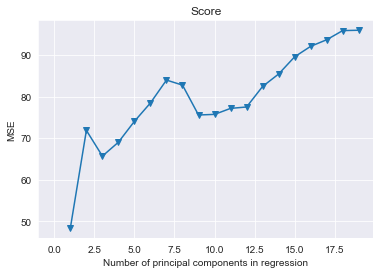

In [198]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Score')
plt.xlim(xmin=-1);

In [199]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)
Projections = pls.predict(scale(X_test))

In [200]:
TEs['Projections'] = Projections
TEs

,DraftKingsSalary,DPointsAllowed,Home,PointSpread,OverUnder,total,Rank,Team,TargetsGame,RecGame,...,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame,Projections
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,3000.0,40.20,True,-1.0,43.0,22.00,20.0,ARI,5.000000,2.428571,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,7.983226
Jermaine Gresham,2600.0,40.20,True,-1.0,43.0,22.00,71.0,ARI,0.800000,0.600000,...,2.200000,0.000000,11.0,11.0,0.000000,0.000000,0.0,0.0,0.4,8.137688
Gabe Holmes,2500.0,40.20,True,-1.0,43.0,22.00,96.0,ARI,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,2.018959
Mark Andrews,2700.0,37.25,False,-2.0,44.0,23.00,21.0,BAL,3.000000,2.000000,...,2.428571,0.285714,4.2,5.7,0.000000,0.000000,0.0,0.0,2.4,7.225893
Nick Boyle,2500.0,37.25,False,-2.0,44.0,23.00,38.0,BAL,3.428571,1.857143,...,0.857143,0.000000,1.0,3.0,0.000000,0.000000,0.0,0.0,0.4,6.472084
Hayden Hurst,2500.0,37.25,False,-2.0,44.0,23.00,92.0,BAL,1.666667,0.333333,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,3.281551
Maxx Williams,2500.0,37.25,False,-2.0,44.0,23.00,33.0,BAL,2.000000,2.000000,...,1.714286,0.000000,3.0,4.0,0.000000,0.000000,0.0,0.0,0.6,6.851255
Greg Olsen,4200.0,32.21,True,2.0,44.0,21.00,44.0,CAR,4.666667,2.666667,...,0.333333,0.333333,1.0,1.0,0.000000,0.000000,0.0,0.0,2.4,6.198237
Ian Thomas,2500.0,32.21,True,2.0,44.0,21.00,53.0,CAR,2.666667,1.666667,...,2.500000,0.000000,5.0,7.5,0.000000,0.000000,0.0,0.0,0.6,5.475883


In [205]:
TEs.to_csv('Week8TEProjections.csv')